# Задание 5

#### 1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

Загрузим файл с данными и посмотрим на таблицу их организующую.

In [3]:

path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


#### 2. сделайте ее перрасчет (ресемплинг) в представление по неделям


In [5]:

brent_dataw = brent_data.copy().resample('W').mean()
print(np.where(brent_dataw.isna()))
brent_dataw.head()

(array([58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64))


,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


Имеются пропуски (индекс = 58)

In [14]:
brent_dataw.columns

Index(['Значение', 'year', 'month', 'dayofmonth', 'quarter', 'dayofyear',
       'weekofyear', 'dayofweek', 'is_holiday', 'is_prev_holiday',
       'is_next_holiday'],
      dtype='object')

Удалим признаки у которых пропадает смысл при таком ресемпле

In [15]:
df = brent_dataw.drop(['dayofmonth', 'dayofweek', 'dayofyear', 'is_holiday', 'is_prev_holiday','is_next_holiday'], axis = 1)
df.head()

,Значение,year,month,quarter,weekofyear
Дата,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,35.0
2010-09-12,77.673333,2010.0,9.000000,3.000000,36.0
2010-09-19,78.693333,2010.0,9.000000,3.000000,37.0
2010-09-26,78.518333,2010.0,9.000000,3.000000,38.0
2010-10-03,81.211667,2010.0,9.333333,3.333333,39.0


Посмотрим пропуски и обработаем их

In [16]:
df.isna().sum()

Значение      1
year          1
month         1
quarter       1
weekofyear    1
dtype: int64

In [17]:
df.iloc[57:60,:]

,Значение,year,month,quarter,weekofyear
Дата,,,,,
2011-10-09,103.476667,2011.0,10.0,4.0,40.0
2011-10-16,NaN,NaN,NaN,NaN,NaN
2011-10-23,109.756667,2011.0,10.0,4.0,42.0


_Уберем пропуски_

возьмем среднее значения между соседними

In [18]:
df.iloc[58,:] = (df.iloc[57,:] + df.iloc[59,:])/2

In [19]:
df.iloc[57:60,:]

,Значение,year,month,quarter,weekofyear
Дата,,,,,
2011-10-09,103.476667,2011.0,10.0,4.0,40.0
2011-10-16,106.616667,2011.0,10.0,4.0,41.0
2011-10-23,109.756667,2011.0,10.0,4.0,42.0


In [20]:
df.isna().sum()

Значение      0
year          0
month         0
quarter       0
weekofyear    0
dtype: int64

In [123]:
# d_brent_data = df['Значение'].values[1:]- df['Значение'].values[:-1]
# s_brent = np.std(d_brent_data) *3
# plt.figure(figsize=(20,4))
# plt.plot(df.iloc[:-1].index,d_brent_data,'.', label='d(BRENT)/dt')
# plt.plot(df.iloc[[0,-1]].index,[s_brent, s_brent],'--k',label ='3 sig')
# plt.plot(df.iloc[[0,-1]].index,[-s_brent, -s_brent],'--k')
# plt.xlabel('t')
# plt.legend()
# plt.title('Цена нефти Brent, USA Dollar')
# plt.show()

# ind_anomal_brent = np.where( abs(d_brent_data)>s_brent)[0]



Посмотрим на размер индексов

In [28]:
df.index

DatetimeIndex(['2010-09-05', '2010-09-12', '2010-09-19', '2010-09-26',
               '2010-10-03', '2010-10-10', '2010-10-17', '2010-10-24',
               '2010-10-31', '2010-11-07',
               ...
               '2019-06-30', '2019-07-07', '2019-07-14', '2019-07-21',
               '2019-07-28', '2019-08-04', '2019-08-11', '2019-08-18',
               '2019-08-25', '2019-09-01'],
              dtype='datetime64[ns]', name='Дата', length=470, freq='W-SUN')

------

#### 3. Добавьте первые разности по стоимости доллара и евро к рублю.

In [21]:
rub_doll=pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx',index_col=[1], parse_dates=[1])
# rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx'], axis=1,inplace = True)
rub_doll.head()



,curs
data,
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [22]:
rub_doll_w = rub_doll.copy().resample('W').mean()
print(np.where(rub_doll_w.isna()))
rub_doll_w.head()

(array([ 18,  70, 122, 227, 279, 331, 383, 435], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


,curs
data,
2010-09-05,30.76125
2010-09-12,30.79402
2010-09-19,30.84672
2010-09-26,30.99920
2010-10-03,30.52764


Посмотрим на отсутствующие значения

In [24]:
rub_doll_w.isna().sum()

curs    8
dtype: int64

In [23]:
rub_doll_w.iloc[17:20]

,curs
data,
2011-01-02,30.38162
2011-01-09,NaN
2011-01-16,30.26765


_Заполним пропуски предыдущим значением_

In [28]:
for ind in [ 18,  70, 122, 227, 279, 331, 383, 435]:
    rub_doll_w.iloc[ind,:] = rub_doll_w.iloc[ind-1,:]

In [29]:
rub_doll_w.isna().sum()

curs    0
dtype: int64

In [30]:
rub_doll_w.iloc[17:20]

,curs
data,
2011-01-02,30.38162
2011-01-09,30.38162
2011-01-16,30.26765


Аналогичено для курса Евро

In [31]:
rub_e=pd.read_excel('R_E01_09_2010_T01_09_2019.xlsx',index_col=[1], parse_dates=[1])
# rub_e.index = pd.to_datetime(rub_e['data'].values).date
rub_e.drop(['nominal','cdx'], axis=1,inplace = True)
rub_e.head()

,curs
data,
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


In [32]:
rub_e_w = rub_e.copy().resample('W').mean()
print(np.where(rub_e_w.isna()))
rub_e_w.head()

(array([ 18,  70, 122, 227, 279, 331, 383, 435], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


,curs
data,
2010-09-05,39.204675
2010-09-12,39.293360
2010-09-19,39.977740
2010-09-26,41.042640
2010-10-03,41.351660


In [33]:
rub_e_w.isna().sum()

curs    8
dtype: int64

In [35]:
rub_e_w.iloc[17:20]

,curs
data,
2011-01-02,40.160760
2011-01-09,NaN
2011-01-16,39.682725


_Заполним пропуски предыдущим значением_

In [36]:
for ind in [ 18,  70, 122, 227, 279, 331, 383, 435]:
    rub_e_w.iloc[ind,:] = rub_e_w.iloc[ind-1,:]

In [37]:
rub_e_w.isna().sum()

curs    0
dtype: int64

In [38]:
rub_e_w.iloc[17:20]

,curs
data,
2011-01-02,40.160760
2011-01-09,40.160760
2011-01-16,39.682725


Посмотрим на индексы по курсам

In [41]:
rub_doll_w.index, rub_e_w.index


(DatetimeIndex(['2010-09-05', '2010-09-12', '2010-09-19', '2010-09-26',
                '2010-10-03', '2010-10-10', '2010-10-17', '2010-10-24',
                '2010-10-31', '2010-11-07',
                ...
                '2019-06-30', '2019-07-07', '2019-07-14', '2019-07-21',
                '2019-07-28', '2019-08-04', '2019-08-11', '2019-08-18',
                '2019-08-25', '2019-09-01'],
               dtype='datetime64[ns]', name='data', length=470, freq='W-SUN'),
 DatetimeIndex(['2010-09-05', '2010-09-12', '2010-09-19', '2010-09-26',
                '2010-10-03', '2010-10-10', '2010-10-17', '2010-10-24',
                '2010-10-31', '2010-11-07',
                ...
                '2019-06-30', '2019-07-07', '2019-07-14', '2019-07-21',
                '2019-07-28', '2019-08-04', '2019-08-11', '2019-08-18',
                '2019-08-25', '2019-09-01'],
               dtype='datetime64[ns]', name='data', length=470, freq='W-SUN'))

rub_doll_w.index, rub_e_w.index имеют одинаковый размер с brent_dataw.index

И сделаем их визуализацию совместно с ценой Brent

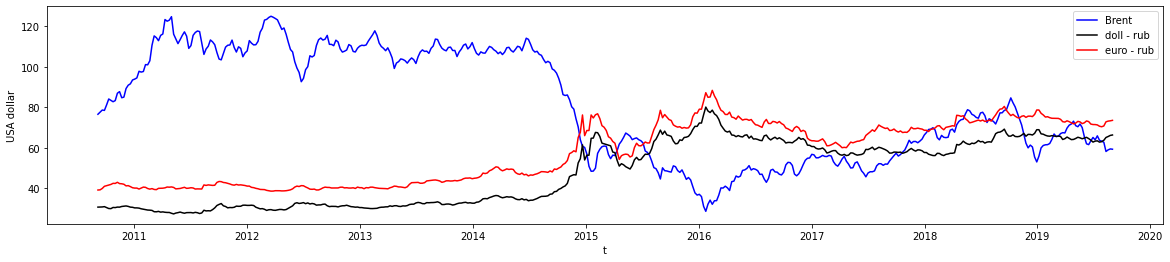

In [47]:
plt.figure(figsize=(20,4))
plt.plot(df.index, df['Значение'].values, '-b', label='Brent ')
plt.plot(rub_doll_w.index,rub_doll_w['curs'].values,'-k', label='doll - rub')
plt.plot(rub_e_w.index,rub_e_w['curs'].values,'-r', label='euro - rub')
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.legend()
plt.show()

In [55]:
# добавим первую разность в таблицу курса долларов и курса евро
rub_doll_w['d1_doll'] = 0.0
rub_doll_w['d1_doll'].iloc[1:] = rub_doll_w.iloc[1:,0].values - rub_doll_w.iloc[:-1,0].values
rub_e_w['d1_e'] = 0.0
rub_e_w['d1_e'].iloc[1:] = rub_e_w.iloc[1:,0].values - rub_e_w.iloc[:-1,0].values
rub_doll_w.head(3), rub_e_w.head(3)

(                curs  d1_doll
 data                         
 2010-09-05  30.76125  0.00000
 2010-09-12  30.79402  0.03277
 2010-09-19  30.84672  0.05270,                  curs      d1_e
 data                           
 2010-09-05  39.204675  0.000000
 2010-09-12  39.293360  0.088685
 2010-09-19  39.977740  0.684380)

_Добавим эти параметры в таблицу Brent_

In [56]:
df['d1_doll']=0.0
df['d1_doll'] = rub_doll_w['d1_doll'].values
df['d1_e']=0.0
df['d1_e'] = rub_e_w['d1_e'].values
df.head()

,Значение,year,month,quarter,weekofyear,d1_doll,d1_e
Дата,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,35.0,0.00000,0.000000
2010-09-12,77.673333,2010.0,9.000000,3.000000,36.0,0.03277,0.088685
2010-09-19,78.693333,2010.0,9.000000,3.000000,37.0,0.05270,0.684380
2010-09-26,78.518333,2010.0,9.000000,3.000000,38.0,0.15248,1.064900
2010-10-03,81.211667,2010.0,9.333333,3.333333,39.0,-0.47156,0.309020


-----

#### 4. Постройте модель предсказания 1-й точки от текущей (h=1).

In [58]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [64]:
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Дата') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Дата') >  split_date].copy()

In [78]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [61]:
 # добавим историю на глубину 3 измерения от текущего (р=3)
p = 3
for i in range(1, p+1):
    df[f't{i}'] = 0.0
    df[f't{i}'].iloc[i:]=df['Значение'].iloc[:-i].values
df.fillna(0)
# добавим сглаживание 
df['exp_0_05'] = exponential_smoothing(df['Значение'], 0.05)
# добавим первую разность
df['d1'] = 0.0
df['d1'].iloc[1:] = df['Значение'].iloc[1:].values - df['Значение'].iloc[:-1].values
df.head(10)

,Значение,year,month,quarter,weekofyear,d1_doll,d1_e,t1,t2,t3,exp_0_05,d1
Дата,,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,35.0,0.00000,0.000000,0.000000,0.000000,0.000000,76.616000,0.000000
2010-09-12,77.673333,2010.0,9.000000,3.000000,36.0,0.03277,0.088685,76.616000,0.000000,0.000000,76.668867,1.057333
2010-09-19,78.693333,2010.0,9.000000,3.000000,37.0,0.05270,0.684380,77.673333,76.616000,0.000000,76.770090,1.020000
2010-09-26,78.518333,2010.0,9.000000,3.000000,38.0,0.15248,1.064900,78.693333,77.673333,76.616000,76.857502,-0.175000
2010-10-03,81.211667,2010.0,9.333333,3.333333,39.0,-0.47156,0.309020,78.518333,78.693333,77.673333,77.075210,2.693333
2010-10-10,84.146667,2010.0,10.000000,4.000000,40.0,-0.45426,0.272360,81.211667,78.518333,78.693333,77.428783,2.935000
2010-10-17,83.498333,2010.0,10.000000,4.000000,41.0,-0.05524,0.345380,84.146667,81.211667,78.518333,77.732261,-0.648333
2010-10-24,82.795000,2010.0,10.000000,4.000000,42.0,0.57548,0.532660,83.498333,84.146667,81.211667,77.985398,-0.703333
2010-10-31,83.361667,2010.0,10.000000,4.000000,43.0,-0.06268,-0.041140,82.795000,83.498333,84.146667,78.254211,0.566667


In [68]:
spl_data = '2018-09-05'
train, test = split_data( df, spl_data)
train.shape, test.shape

((418, 12), (52, 12))

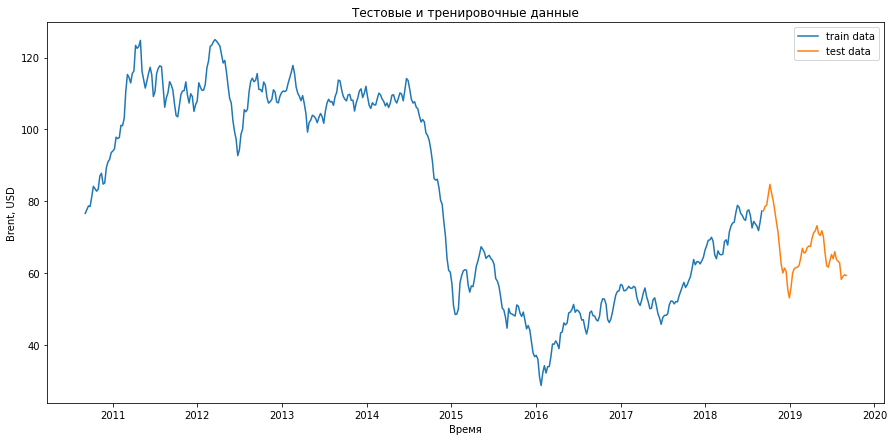

In [71]:
h=1
X_train = train.iloc[:-h,:]
y_train = train[df.columns[0]].values[h:]
X_test = test.iloc[:-h,:]
y_test = test[df.columns[0]].values[h:]

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Brent, USD')
plt.plot(train.index.get_level_values('Дата'),train[df.columns[0]], label='train data' )
plt.plot(test.index.get_level_values('Дата'),test[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

###### Построим модель по всем признакам

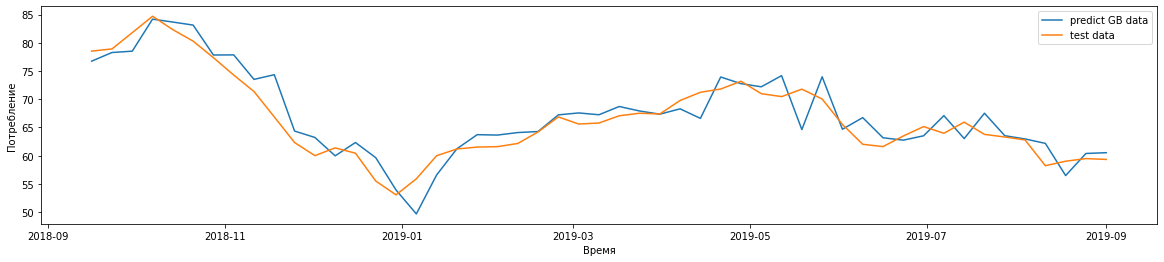

средняя ошибка в процентном отношении:   3.3648811029931314 %


In [79]:
model_gb = GradientBoostingRegressor(max_depth=7, random_state=0, n_estimators=100)
model_gb.fit( X_train, y_train ) 
y_pred = model_gb.predict(X_test)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление')
plt.plot(test.index[h:],y_pred, label='predict GB data' )
plt.plot(test.index[h:],y_test, label='test data')
# plt.plot(df.loc[spl_data:].index, df.loc[spl_data:]['Значение'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test, y_pred = y_pred)

print('средняя ошибка в процентном отношении:  ', er_g, '%')

In [96]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_pred) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_pred) 
er_r2 = r2_score(y_true=y_test, y_pred=y_pred)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   7.904679425163941 
ошибка mae  :   2.2018688256377903 
оценка R2 :   0.8498997605734333


###### Построим модель по всем признакам без diff валют

In [82]:
X_train0 = X_train.drop(['d1_doll', 'd1_e'], axis = 1)
X_test0 = X_test.drop(['d1_doll', 'd1_e'], axis = 1)


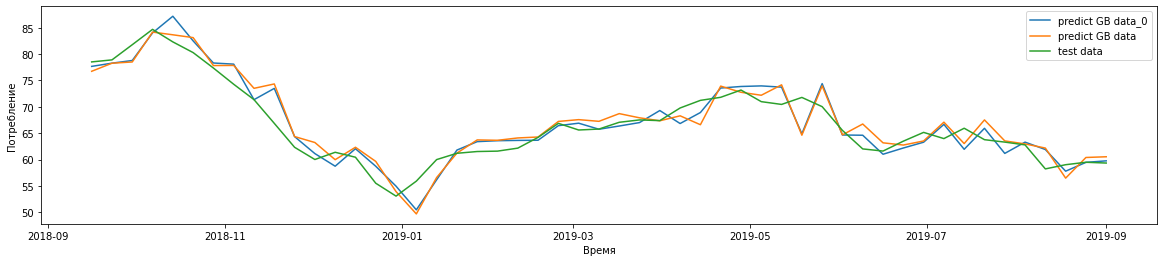

средняя ошибка в процентном отношении:   3.146694579155406 %


In [85]:
model_gb0 = GradientBoostingRegressor(max_depth=7, random_state=0, n_estimators=100)
model_gb0.fit( X_train0, y_train ) 
y_pred0 = model_gb0.predict(X_test0)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление')
plt.plot(test.index[h:],y_pred0, label='predict GB data_0' )
plt.plot(test.index[h:],y_pred, label='predict GB data' )
plt.plot(test.index[h:],y_test, label='test data')
# plt.plot(df.loc[spl_data:].index, df.loc[spl_data:]['Значение'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test, y_pred = y_pred0)

print('средняя ошибка в процентном отношении:  ', er_g, '%')

In [97]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_pred0) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_pred0) 
er_r2 = r2_score(y_true=y_test, y_pred=y_pred0)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   6.919154299417537 
ошибка mae  :   2.0788644819441324 
оценка R2 :   0.868613682970402


In [86]:
X_train.columns

Index(['Значение', 'year', 'month', 'quarter', 'weekofyear', 'd1_doll', 'd1_e',
       't1', 't2', 't3', 'exp_0_05', 'd1'],
      dtype='object')

###### Построим простую модель без дополнительных признаков¶

In [88]:
X_train_S = X_train.drop(['d1_doll', 'd1_e','t1', 't2', 't3', 'exp_0_05', 'd1'], axis = 1)
X_test_S = X_test.drop(['d1_doll', 'd1_e','t1', 't2', 't3', 'exp_0_05', 'd1'], axis = 1)

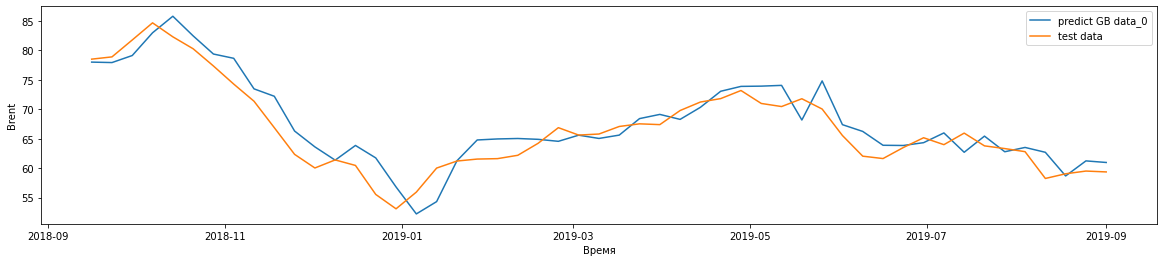

средняя ошибка в процентном отношении:   3.5661806947711066 %


In [89]:
model_gb_S = GradientBoostingRegressor(max_depth=7, random_state=0, n_estimators=100)
model_gb_S.fit( X_train_S, y_train ) 
y_pred_S = model_gb_S.predict(X_test_S)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Brent')
plt.plot(test.index[h:],y_pred_S, label='predict GB data_0' )
plt.plot(test.index[h:],y_test, label='test data')
# plt.plot(df.loc[spl_data:].index, df.loc[spl_data:]['Значение'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test, y_pred = y_pred_S)

print('средняя ошибка в процентном отношении:  ', er_g, '%')

In [98]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_pred_S) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_pred_S) 
er_r2 = r2_score(y_true=y_test, y_pred=y_pred_S)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   7.81725119018525 
ошибка mae  :   2.3163918194700557 
оценка R2 :   0.8515599163238573


###### Построим простую модель + diff валют

In [92]:
X_train_Sd = X_train.drop(['t1', 't2', 't3', 'exp_0_05', 'd1'], axis = 1)
X_test_Sd = X_test.drop(['t1', 't2', 't3', 'exp_0_05', 'd1'], axis = 1)

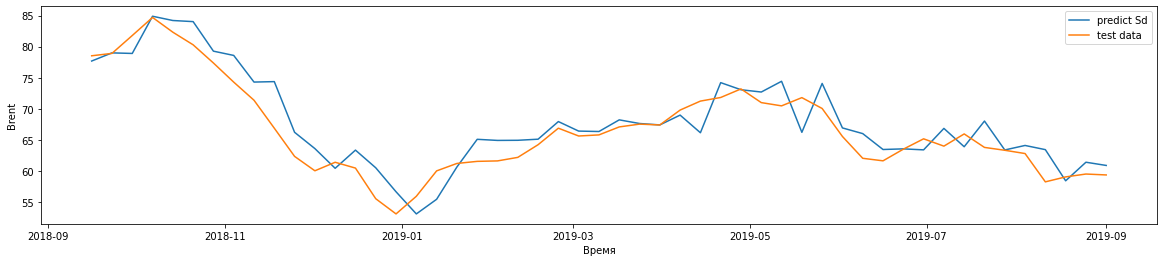

средняя ошибка в процентном отношении:   3.6347515190101194 %


In [125]:
model_gb_Sd = GradientBoostingRegressor(max_depth=7, random_state=0, n_estimators=100)
model_gb_Sd.fit( X_train_Sd, y_train ) 
y_pred_Sd = model_gb_Sd.predict(X_test_Sd)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Brent')
plt.plot(test.index[h:],y_pred_Sd, label='predict Sd' )
plt.plot(test.index[h:],y_test, label='test data')
# plt.plot(df.loc[spl_data:].index, df.loc[spl_data:]['Значение'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test, y_pred = y_pred_Sd)

print('средняя ошибка в процентном отношении:  ', er_g, '%')

In [99]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_pred_Sd) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_pred_Sd) 
er_r2 = r2_score(y_true=y_test, y_pred=y_pred_Sd)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   8.625450840195684 
ошибка mae  :   2.364941503482822 
оценка R2 :   0.8362131888417978


Построим графики по всем предсказаниям:

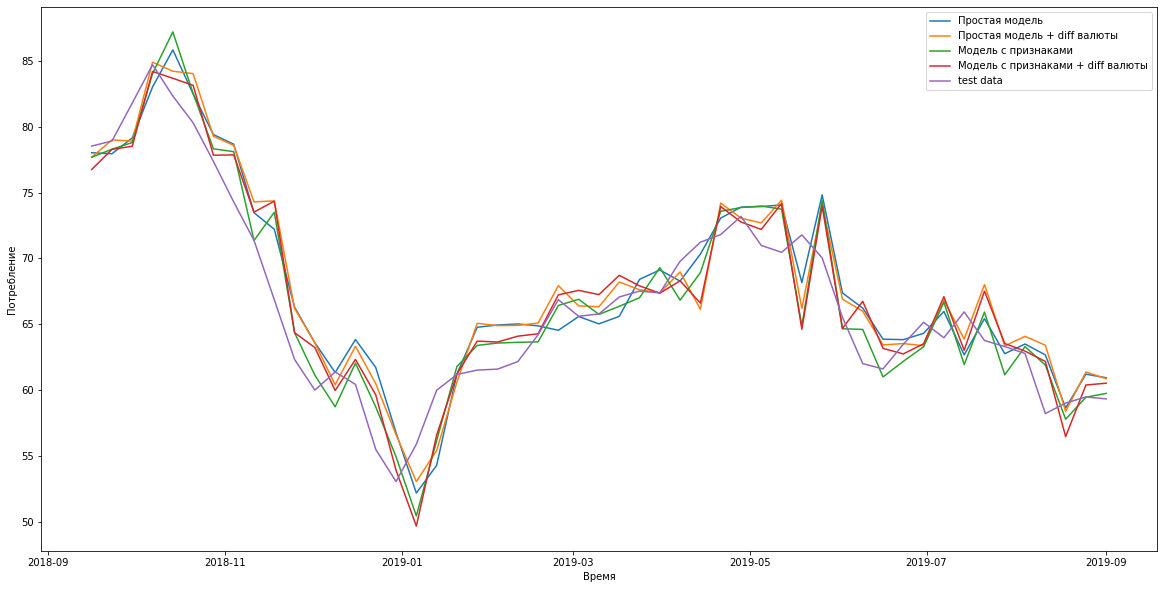

In [127]:
plt.figure( figsize=( 20, 10 ))

plt.xlabel('Время')
plt.ylabel('Потребление')
plt.plot(test.index[h:],y_pred_S, label='Простая модель' )
plt.plot(test.index[h:],y_pred_Sd, label='Простая модель + diff валюты' )
plt.plot(test.index[h:],y_pred0, label='Модель с признаками' )
plt.plot(test.index[h:],y_pred, label='Модель с признаками + diff валюты' )
plt.plot(test.index[h:],y_test, label='test data')
# plt.plot(df.loc[spl_data:].index, df.loc[spl_data:]['Значение'], label='исходный ряд')

plt.legend()
plt.show()

-----


#### 5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [114]:
# R2_score

ind = 52
print(f'Простая модель                    : {r2_score(y_true=y_test[:ind], y_pred=y_pred_S[:ind])}')
print(f'Простая модель + diff валюты      : {r2_score(y_true=y_test[:ind], y_pred=y_pred_Sd[:ind])}')
print(f'Модель с признаками               : {r2_score(y_true=y_test[:ind], y_pred=y_pred0[:ind])}')
print(f'Модель с признаками + diff валюты : {r2_score(y_true=y_test[:ind], y_pred=y_pred[:ind])}')


Простая модель                    : 0.8515599163238573
Простая модель + diff валюты      : 0.8362131888417978
Модель с признаками               : 0.868613682970402
Модель с признаками + diff валюты : 0.8498997605734333


In [121]:
# Средняя ошибка в процентном отношении:

mean_absolute_percentage_error(y_true=y_test[:ind], y_pred = y_pred_S[:ind])
ind = 52
print(f'Простая модель                    : {round(mean_absolute_percentage_error(y_true=y_test[:ind], y_pred = y_pred_S[:ind]),2)} %')
print(f'Простая модель + diff валюты      : {round(mean_absolute_percentage_error(y_true=y_test[:ind], y_pred = y_pred_Sd[:ind]),2)} %')
print(f'Модель с признаками               : {round(mean_absolute_percentage_error(y_true=y_test[:ind], y_pred = y_pred0[:ind]),2)} %')
print(f'Модель с признаками + diff валюты : {round(mean_absolute_percentage_error(y_true=y_test[:ind], y_pred = y_pred[:ind]),2)} %')


Простая модель                    : 3.57 %
Простая модель + diff валюты      : 3.63 %
Модель с признаками               : 3.15 %
Модель с признаками + diff валюты : 3.36 %


##### Вывод
В целом видно что добавление признаков diff валют в модель прогнозирования ухудшает прогноз, что для простой модели что для модели с признаками.

Посмотрим на график: 

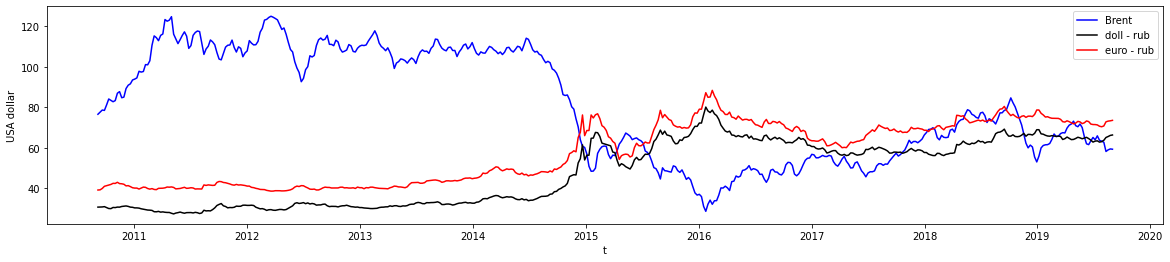

In [115]:
plt.figure(figsize=(20,4))
plt.plot(df.index, df['Значение'].values, '-b', label='Brent ')
plt.plot(rub_doll_w.index,rub_doll_w['curs'].values,'-k', label='doll - rub')
plt.plot(rub_e_w.index,rub_e_w['curs'].values,'-r', label='euro - rub')
plt.ylabel('USA dollar')
plt.xlabel('t')
plt.legend()
plt.show()

Можно заметить что хотя в целом корреляция между валютами и ценами на нефть имеется но на участке прогноза в конце 2018  года имеется резкое падение  цен на нефть, при этом валюты ведут себя независимо в этот период. Следовательно корреляция валют на цену нефти в данном случае в прогнозе вносит дополнительную ошибку

Проверим оценку модели на участке прогноза до этого падения, то есть на первых __8 точках__ прогноза

In [108]:
ind = 8
print(f'Простая модель                    : {r2_score(y_true=y_test[:ind], y_pred=y_pred_S[:ind])}')
print(f'Простая модель + diff валюты      : {r2_score(y_true=y_test[:ind], y_pred=y_pred_Sd[:ind])}')
print(f'Модель с признаками               : {r2_score(y_true=y_test[:ind], y_pred=y_pred0[:ind])}')
print(f'Модель с признаками + diff валюты : {r2_score(y_true=y_test[:ind], y_pred=y_pred[:ind])}')


Простая модель                    : 0.29843618933222205
Простая модель + diff валюты      : 0.33629134407687655
Модель с признаками               : 0.25536694832179285
Модель с признаками + diff валюты : 0.48964031124464824


In [122]:
# Средняя ошибка в процентном отношении:

mean_absolute_percentage_error(y_true=y_test[:ind], y_pred = y_pred_S[:ind])
ind = 8
print(f'Простая модель                    : {round(mean_absolute_percentage_error(y_true=y_test[:ind], y_pred = y_pred_S[:ind]),2)} %')
print(f'Простая модель + diff валюты      : {round(mean_absolute_percentage_error(y_true=y_test[:ind], y_pred = y_pred_Sd[:ind]),2)} %')
print(f'Модель с признаками               : {round(mean_absolute_percentage_error(y_true=y_test[:ind], y_pred = y_pred0[:ind]),2)} %')
print(f'Модель с признаками + diff валюты : {round(mean_absolute_percentage_error(y_true=y_test[:ind], y_pred = y_pred[:ind]),2)} %')


Простая модель                    : 2.82 %
Простая модель + diff валюты      : 2.51 %
Модель с признаками               : 2.67 %
Модель с признаками + diff валюты : 2.28 %


Здесь действительно видно что на участке пока не произошло резкое падение Brent добавление признаков diff валют увеличивают точность прогноза